In [4]:
### Exploratory Data Analysis and Visualization
# Importing Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import geopandas as gpd

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading Country GeoData
# Load the Natural Earth dataset
world = gpd.read_file('./natural_earth_geo_admin0/ne_10m_admin_0_countries.shp')

# Group ISO A3 codes by continent
iso_a3_by_continent = world.groupby('CONTINENT')['ISO_A3'].apply(list).to_dict()

# Iterate over the dictionary and remove '-99' values
cleaned_iso = {continent: [country for country in countries if country != '-99'] for continent, countries in iso_a3_by_continent.items()}

In [7]:
## Loading of the datasets
## Agriculture & Rural Development 
# Rural population (% of total population) For the 70 percent of the world's poor who live in rural areas, agriculture is the main source of income and employment. 
# But depletion and degradation of land and water pose serious challenges to producing enough food and other agricultural products to sustain livelihoods here and meet the needs of urban populations. 
# Data presented here include measures of agricultural inputs, outputs, and productivity compiled by the UN's Food and Agriculture Organization.
# Dataset from WorldBank (26-May-2023)
df = pd.read_csv("./worldbank_agri/API_1_DS2_en_csv_v2_5455649.csv", skiprows=3)
# https://api.worldbank.org/v2/en/topic/1?downloadformat=csv

In [8]:
# Databank dataset inspection
df.drop(columns=["Unnamed: 67"], inplace=True) #Obsolete column with Null values
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046919,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,NaN
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303687,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,NaN
2,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239000,49.254000,49.2700,49.285000,49.300000,...,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,NaN
3,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.4226,1.245827,1.065002,...,0.691192,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,NaN
4,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.000,27481.000000,27918.000000,28318.0000,28673.000000,28980.000000,...,58652.000000,59006.000000,59314.000000,59577.000000,59791.000000,59963.000000,60091.000000,60011.000000,59803.000000,NaN


In [9]:
# Dimensions of DataFrame
df.shape

(11172, 67)

In [10]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11172 non-null  object 
 1   Country Code    11172 non-null  object 
 2   Indicator Name  11172 non-null  object 
 3   Indicator Code  11172 non-null  object 
 4   1960            632 non-null    float64
 5   1961            4555 non-null   float64
 6   1962            4748 non-null   float64
 7   1963            4765 non-null   float64
 8   1964            4775 non-null   float64
 9   1965            4826 non-null   float64
 10  1966            4858 non-null   float64
 11  1967            4871 non-null   float64
 12  1968            4889 non-null   float64
 13  1969            4885 non-null   float64
 14  1970            5364 non-null   float64
 15  1971            5368 non-null   float64
 16  1972            5374 non-null   float64
 17  1973            5376 non-null  

In [11]:
# Describe DataFrame
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,6.320000e+02,4.555000e+03,4.748000e+03,4.765000e+03,4.775000e+03,4.826000e+03,4.858000e+03,4.871000e+03,4.889000e+03,4.885000e+03,...,7.696000e+03,7.716000e+03,8.776000e+03,7.736000e+03,7.728000e+03,7.711000e+03,7.684000e+03,7.182000e+03,3.540000e+03,170.000000
mean,1.093038e+09,1.654885e+08,1.628815e+08,1.797908e+08,1.983275e+08,2.393604e+08,2.381413e+08,2.499119e+08,2.580527e+08,3.306279e+08,...,4.349823e+09,4.467862e+09,3.778675e+09,4.305758e+09,4.535517e+09,4.600358e+09,4.761723e+09,5.373643e+09,1.217253e+10,1.532650
std,8.458841e+09,3.343148e+09,3.362091e+09,3.735752e+09,4.145210e+09,4.588822e+09,4.568374e+09,4.808793e+09,4.953196e+09,6.608612e+09,...,7.830856e+10,8.069766e+10,7.349175e+10,7.880005e+10,8.280874e+10,8.440930e+10,8.766616e+10,9.616307e+10,1.536880e+11,1.548552
min,0.000000e+00,-2.498824e+00,-3.171646e+00,-3.206682e+00,-3.078607e+00,-3.303554e+00,-3.563265e+00,-3.820587e+00,-1.051712e+01,-1.300982e+01,...,-5.096810e+00,-5.007410e+00,-5.802638e+00,-4.673748e+00,-4.702139e+00,-5.145168e+00,-5.989875e+00,-7.646281e+00,-8.434153e+00,0.024394
25%,6.111000e+01,1.427678e+01,1.162989e+01,1.170793e+01,1.171388e+01,1.197647e+01,1.186685e+01,1.200000e+01,1.210323e+01,1.243000e+01,...,9.454018e+00,1.000000e+01,5.917213e+00,9.960394e+00,9.984725e+00,1.000000e+01,1.017359e+01,8.719629e+00,5.023440e+00,0.717613
50%,9.584850e+01,9.538300e+01,8.596012e+01,8.657000e+01,8.719200e+01,8.648092e+01,8.715750e+01,8.810900e+01,8.808200e+01,8.788000e+01,...,8.878239e+01,9.047000e+01,8.605286e+01,9.227262e+01,9.128500e+01,9.019043e+01,9.186401e+01,7.899754e+01,6.889085e+01,1.098018
75%,4.539689e+06,1.051960e+05,8.646250e+04,8.470000e+04,8.736000e+04,8.981500e+04,8.998100e+04,9.022000e+04,9.117000e+04,9.391000e+04,...,1.900103e+04,1.867001e+04,1.841500e+04,1.841449e+04,1.880100e+04,1.925345e+04,1.967540e+04,1.487000e+04,7.134665e+03,1.801351
max,1.040337e+11,1.079593e+11,1.109413e+11,1.231941e+11,1.366833e+11,1.475283e+11,1.460780e+11,1.547463e+11,1.597173e+11,2.817427e+11,...,3.226817e+12,3.302406e+12,3.177582e+12,3.197479e+12,3.376945e+12,3.419240e+12,3.513631e+12,3.704093e+12,4.154467e+12,10.796677


In [23]:
def missing_plot(
        df,
        title='',
        xlabel='Columns',
        ylabel='Number of Missing Values',
        cbar_label='Normalized Missing Values',
        cm=plt.cm.coolwarm,
        hline=False,
        hline_y=0,
        hline_label='Threshold at',
        hline_color='red'
    ):
    # Normalize the missing values to map them to colors
    normalized_values = (df - df.min()) / (df.max() - df.min())
    
    # Create a colormap (you can choose any colormap you like)
    cmap = cm
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(24, 6))
    
    # Create a bar plot with custom colors
    bars = sns.barplot(ax=ax, x=df.index, y=df.values, palette=cmap(normalized_values))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    
    # Create a color bar legend for reference
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=missing_values.min(), vmax=missing_values.max()))
    sm.set_array([])
    
    # Add the colorbar to the same axis (ax) where the bars are plotted
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(cbar_label)

    if hline:
        # Add a custom horizontal line at y = 2 (you can adjust the y-value as needed)
        plt.axhline(y=hline_y, color=hline_color, linestyle='--', label=hline_label)
        plt.legend()
        
    plt.show()

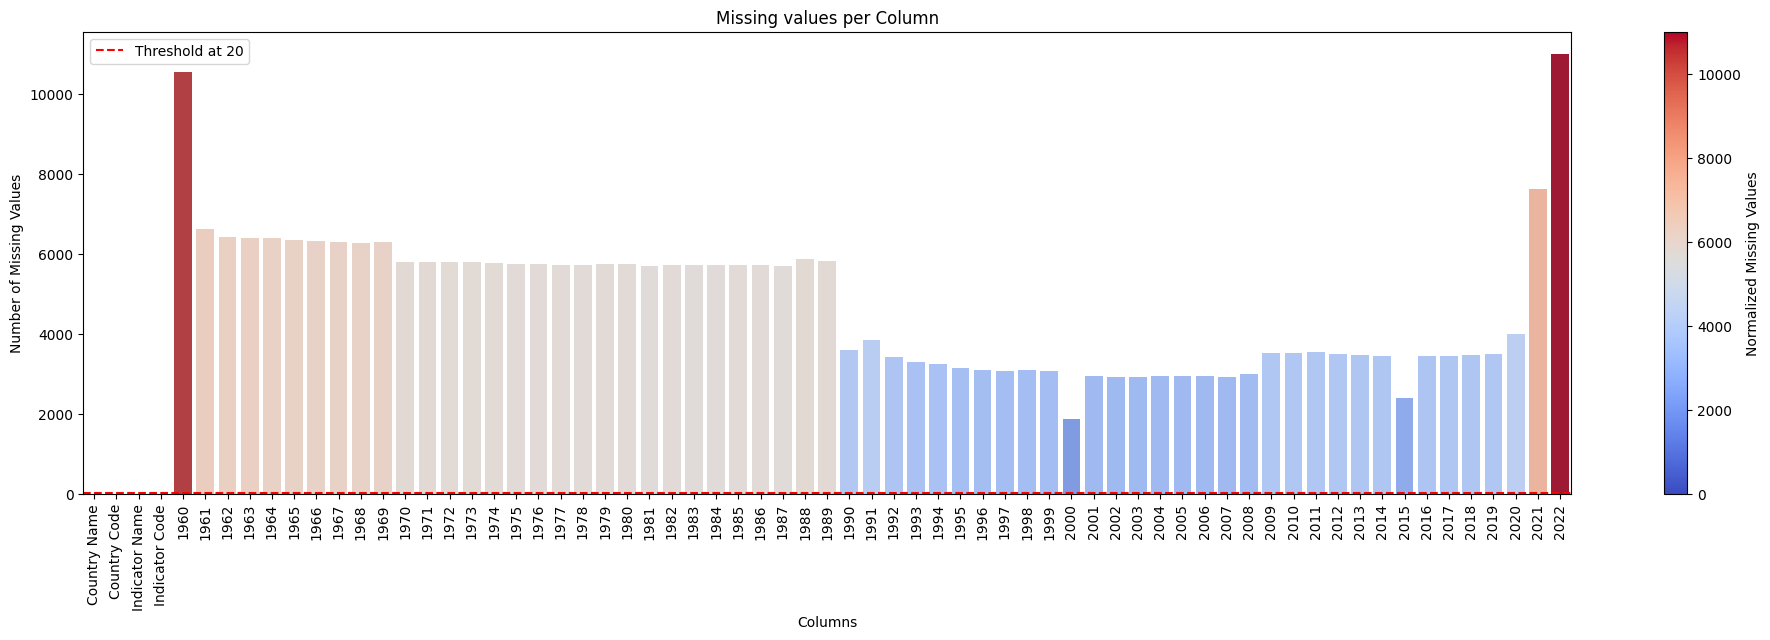

In [25]:
# Lets have a look at the complete dataset with all the indicators included, what we see is that 1960, 2021 and 2022 have too many missing values compared to the majority of the dataset and decision is to drop these columns.

# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_plot(missing_values, 'Missing values per Column', hline_y=20, hline=True, hline_label='Threshold at 20')

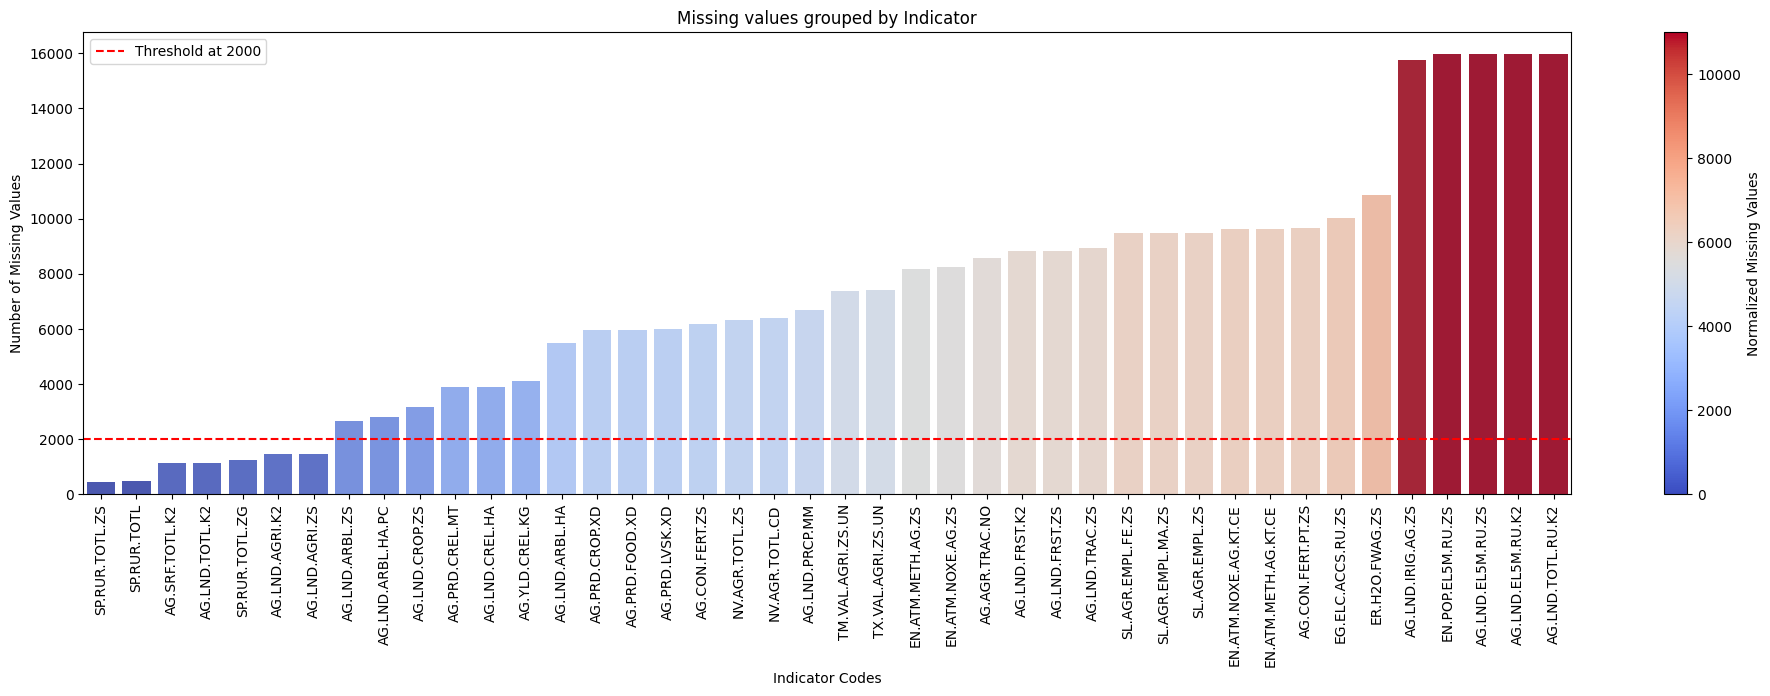

In [26]:
# Here is visualized how many missing values per indicator summed over all columns exist. This also provides us with insights on how many missing values we deem acceptable.
# For the visualization we want to use the indicators with minimal missing values, for reference a hline of 2000 is also plotted.
#
# The indicators that will be used for the GeoData Visualization are:
# SP.RUR.TOTL.ZS
# SP.RUR.TOTL
# AG.SRF.TOTL.K2
# AG.LND.TOTL.K2
# SP.RUR.TOTL.ZG
# AG.LND.AGRI.K2
# AG.LND.AGRI.ZS

group_by_indicator = df.groupby('Indicator Code')
missing_values_per_indicator = (group_by_indicator.apply(lambda x: x.isna().sum()))
missing_values_per_indicator_t = missing_values_per_indicator.transpose().sum()
missing_values_per_indicator_t_sorted = missing_values_per_indicator_t.sort_values()
missing_plot(missing_values_per_indicator_t_sorted,'Missing values grouped by Indicator',xlabel='Indicator Codes',hline=True,hline_y=2000,hline_label='Threshold at 2000')


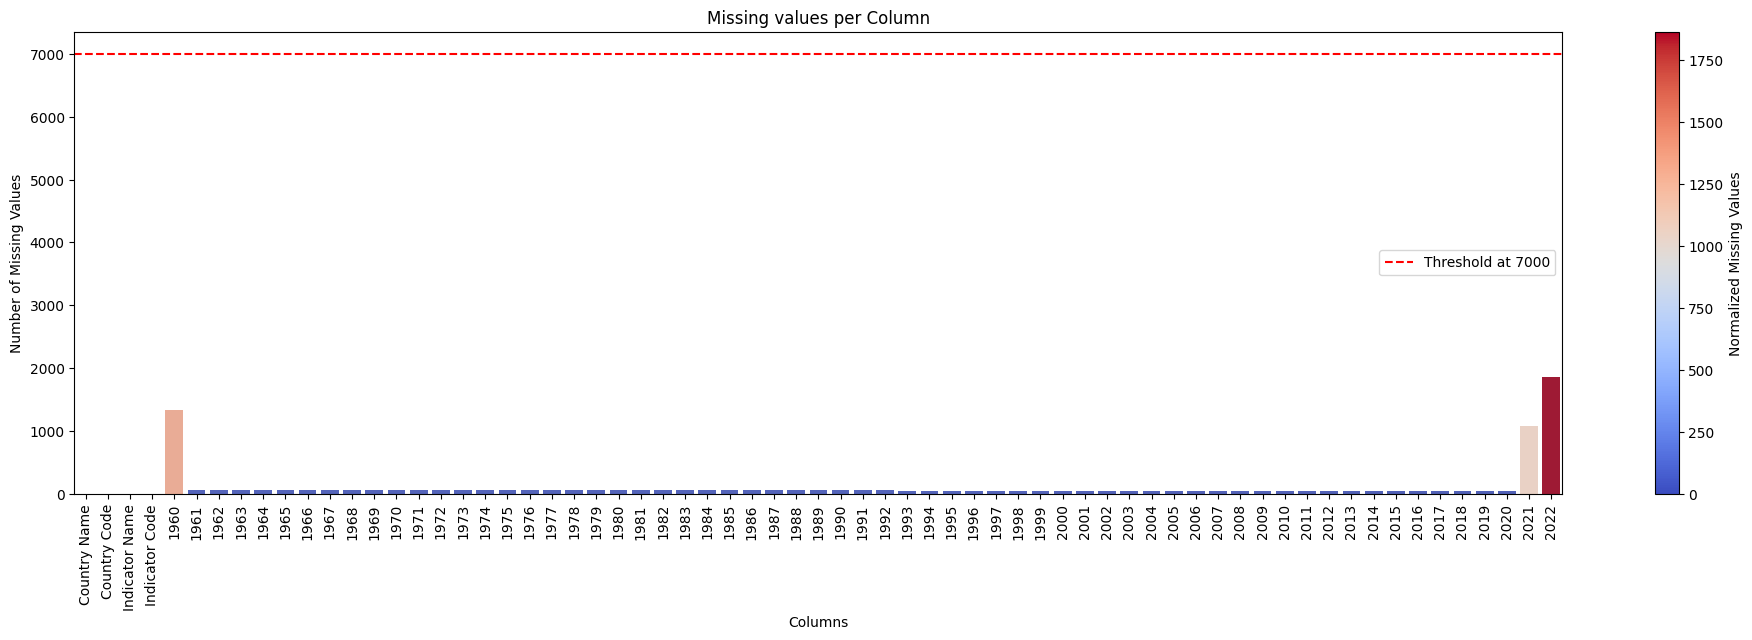

In [12]:
# Cleaning up the dataframe for obsolete columns after selection has been performed.
indicator_keep = 'SP.RUR.TOTL.ZS', 'SP.RUR.TOTL', 'AG.SRF.TOTL.K2', 'AG.LND.TOTL.K2', 'SP.RUR.TOTL.ZG', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS'
indicator_codes_unique = df['Indicator Code'].unique()
drop_indicators = [x for x in indicator_codes_unique if x not in indicator_keep]

# Use boolean indexing to select rows to drop and then use drop method
df.drop(df[df['Indicator Code'].isin(drop_indicators)].index, inplace=True)

# Check if the updated dataframe only contains the desired indicators
df['Indicator Code'].unique()

# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_plot(missing_values,'Missing values per Column',hline_y=7000,hline=True,hline_label='Threshold at 7000')

# Dropping the year columns that were mentioned earlier with too many missing values which are still 1960, 2021 and 2022
df.drop(columns=['1960','2021','2022'],inplace=True)

# Reindexing dataframe
df.reset_index(inplace=True,drop=True)

In [27]:
# The cleaned dataset after selecting appropiate indicators
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046919,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,NaN
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303687,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,NaN
2,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239000,49.254000,49.270000,49.285000,49.300000,...,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,NaN
3,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.422600,1.245827,1.065002,...,0.691192,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,NaN
4,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.000,27481.000000,27918.000000,28318.000000,28673.000000,28980.000000,...,58652.000000,59006.000000,59314.000000,59577.000000,59791.000000,59963.000000,60091.000000,60011.000000,59803.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN
11168,Zimbabwe,ZWE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,109850.000000,110700.000000,111550.000000,112400.000000,113050.000000,...,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,NaN,NaN
11169,Zimbabwe,ZWE,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,21.957560,20.211886,24.231738,33.906634,36.319613,...,25.625000,25.775000,19.650000,32.575000,36.600000,33.200000,33.200000,33.200000,NaN,NaN
11170,Zimbabwe,ZWE,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,NaN,376.272727,355.545455,320.666667,460.000000,375.000000,...,368.705036,349.491525,251.118211,944.202899,671.559633,623.474178,623.474178,623.474178,NaN,NaN


Current shape of dataframe (11172, 67)


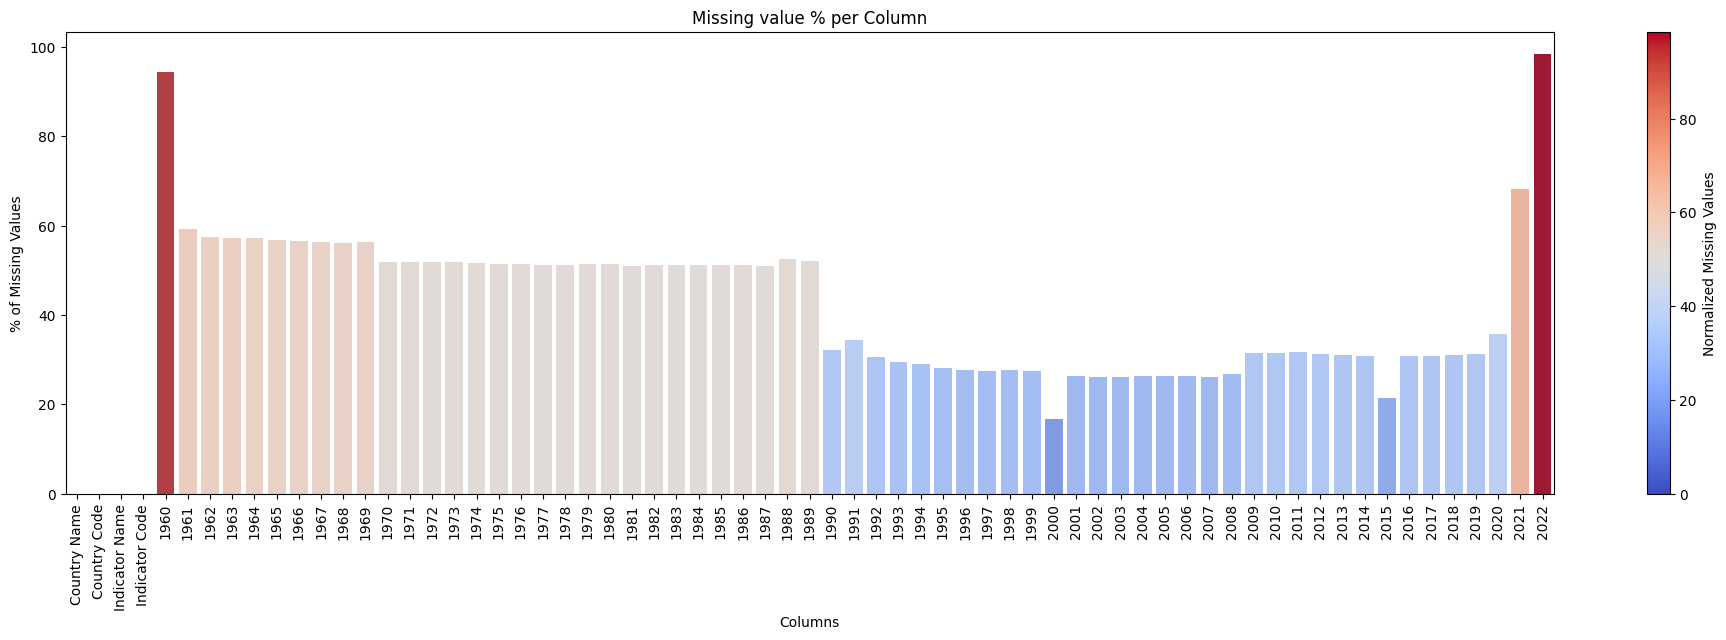

In [28]:
# Calculate the number of missing values per column - which has been reduced to below 3% per column on average
print('Current shape of dataframe',df.shape)
missing_values = (df.isnull().sum() / df.shape[0]) * 100
missing_plot(missing_values,'Missing value % per Column',ylabel='% of Missing Values',hline_y=100,hline=False,hline_label='Threshold at 7000')

In [29]:
# Remaining missing value data e.g. for 1961
is_missing = df[df['1961'].isna()].index
df[df['1961'].isna()].head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046919,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,NaN
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303687,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,NaN
5,Aruba,ABW,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017817,0.014812,0.012519,0.018611,0.023921,0.030269,NaN,NaN,NaN,NaN
9,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,486033.519553,413407.821229,370949.720670,555307.262570,739664.804469,969273.743017,NaN,NaN,NaN,NaN
10,Aruba,ABW,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Aruba,ABW,Rural population living in areas where elevati...,EN.POP.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.391895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Aruba,ABW,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Replace missing values with 0, in visualization if the value is exactly 0 we can show it as missing.
df.fillna(0,inplace=True)
# Show updated dataframe for the example of 1961 indexes
df.iloc[is_missing].head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046919,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,0.0
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.303687,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,0.0
5,Aruba,ABW,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,Aruba,ABW,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,Aruba,ABW,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017817,0.014812,0.012519,0.018611,0.023921,0.030269,0.000000,0.000000,0.000000,0.0
9,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,486033.519553,413407.821229,370949.720670,555307.262570,739664.804469,969273.743017,0.000000,0.000000,0.000000,0.0
10,Aruba,ABW,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11,Aruba,ABW,Rural population living in areas where elevati...,EN.POP.EL5M.RU.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.391895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12,Aruba,ABW,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [31]:
# Selecting all year column indexes
years = df.columns[4:]
years

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [32]:
# For visualization purposes we will add column that contains the continent of each country based on the ISO_A3 code.
continents = []
for ISO_A3 in df['Country Code']:
    found = False  # Flag to check if a match is found
    for continent, codes in cleaned_iso.items():
        add = None
        if ISO_A3 in codes:
            if continent == 'Seven seas (open ocean)':
                add = 'Seven seas'
            else:
                add = continent
            continents.append(add)
            found = True  # Set the flag to True when a match is found
            break  # Exit the loop when a match is found
    if not found:
        continents.append('Unclassified')

df.insert(2, 'Continent', continents)

In [33]:
# Continent has been added to the dataframe at column index 2
continents = sorted(df['Continent'].unique())
continents

['Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'Seven seas',
 'South America',
 'Unclassified']

In [35]:
import json
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

years = [int(year) for year in years]
min_year = min(years)
max_year = max(years)

# Create a Dash web application
app = dash.Dash(__name__)

df_rural = df[df['Indicator Code'] == 'SP.RUR.TOTL.ZS']

In [36]:
# Define the layout of the dashboard
app.layout = html.Div(
    id='app-container',
    style={
        "display": "flex",
        "flex-direction": "column",
        "align-items": "center",
        "justify-content": "space-between",
        "backgroundColor": "white",
        "padding": "5px",
        "margin": "0",
        "width": "100%",
        "height": "99vh",
        "overflow-y": "hidden",
        "box-sizing": "border-box",
        "font-family": "Arial",
    },
    children=[
        ## Hidden Divs
        html.Div(id='selected-year', style={'display': 'none'}),
        html.Div(id='hovered-country', style={'display': 'none'}),
        ######### App content #########
        # Contains the title and some info
        html.Div(
            id='header-container',
            style={
                "backgroundColor": "black",
                "padding": "10px",
                "width": "100%",
                "height": "8%",
                "box-sizing": "border-box",
                "display": "flex",
                "flex-direction": "column",
                "align-items": "center",
                "justify-content": "center",
            },
            children=[
                html.Div(
                    id='title-container',
                    style={
                        "backgroundColor": "black",
                        "flex": "1",
                        "margin": "2px 0",
                    },
                    children=[
                        html.H1("Interactive Geo Data Visualization", style={'text-align': 'center','color':'white'}),
                        html.H4("WorldBank Dataset: Agriculture & Rural Development ", style={'text-align': 'center','color':'white'}),
                    ]
                ),
            ]
        ),
        # End of title and info container

        # Contains the graphs
        html.Div(
            id='content-container',
            style={
                "backgroundColor": "white",
                "padding": "5px",
                "width": "100%",
                "height": "100%",
                "box-sizing": "border-box",
                "display": "flex",
                "flex-direction": "column",
                "justify-content": "space-between",
            },
            children=[
                html.Div(
                    id='top-container',
                    style={
                        "backgroundColor": "white",
                        "flex": "6",
                        "display": "flex",
                        "flex-direction": "row",
                        "justify-content": "space-between",
                    },
                    children=[
                        html.Div(
                            id='left-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "3",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                id='chloropleth-map',
                                figure=px.choropleth(
                                    df_rural,
                                    locations='Country Code',
                                    color=str(min_year),  # Initialize with the minimum year
                                    hover_name='Country Name',
                                    hover_data=['Continent','Country Code'],
                                    title=f'Choropleth Map of Rural Percentage ({str(min_year)})',
                                    projection='equirectangular',
                                    color_continuous_scale='Viridis',
                                    color_continuous_midpoint=50,
                                    range_color=[0, 100],
                                ).update_layout(
                                    title={'x': 0.5},
                                    margin={'l': 0, 'r': 0, 't': 50, 'b': 0},
                                    hovermode='closest',
                                    dragmode=False
                                ),
                                    # Chloropleth Style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                        html.Div(
                            id='right-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='barplot',
                                    figure=px.bar(
                                        df_rural[df_rural['Country Name'] == 'China'] \
                                            .melt(
                                                id_vars=['Country Name', 'Country Code', 'Continent', \
                                                         'Indicator Name', 'Indicator Code'], 
                                                var_name='Year', 
                                                value_name='Rural population Pcnt.'),
                                        x='Rural population Pcnt.', 
                                        y='Year', 
                                        hover_data=['Country Code', 'Country Name','Rural population Pcnt.','Year'],
                                        orientation='h',
                                        color='Rural population Pcnt.',
                                        color_continuous_scale='Bluered_r',
                                        color_continuous_midpoint=50,
                                        range_color=[0, 100],
                                        title=f'Hover-over: Rural Population (% of Total Population) in {"CHN"}',
                                    ).update_layout(
                                        dragmode=False,
                                        title={'x': 0.5},
                                        showlegend=False,
                                    ),
                                    # Bar Style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                    ]
                ),
                html.Div(
                    id='bottom-container',
                    style={
                        "backgroundColor": "white",
                        "flex": "4",
                        "display": "flex",
                        "flex-direction": "row",
                        "justify-content": "space-between",
                    },
                    children=[
                        html.Div(
                            id='bottom-left-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='box',
                                    figure=px.box(
                                        df_rural,
                                        x="Continent", 
                                        y=str(1961),
                                        color='Continent',
                                        title=f'Box Plot of Rural Percentage (1961)',
                                    ).update_layout(
                                        title={'x': 0.5},
                                        dragmode=False,
                                    ).update_traces(
                                        showlegend=False
                                    ).update_yaxes(
                                        title="Population % Living in Rural Areas",
                                        range=[0, 100],
                                    ).update_xaxes(
                                        title="Grouped by Continent",
                                    ),
                                    # Box style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                        html.Div(
                            id='bottom-right-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='histogram',
                                    figure=px.histogram(
                                        df_rural,
                                        x="1961",
                                        nbins=20,
                                        title=f'Histogram of Rural Percentage binned (1961)',
                                    ).update_layout(
                                        title={'x': 0.5},
                                        dragmode=False,
                                    ).update_traces(
                                        marker=dict(line=dict(width=2), opacity=0.7), selector=dict(type='histogram')
                                    ).update_yaxes(
                                        title="Number of Countries",
                                        range=[0, 35],
                                    ).update_xaxes(
                                        title="Percentage Range Bins",
                                        range=[0, 100],
                                        dtick=2.5,
                                    ),
                                    # Histogram Style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                    ]
                ),
            ]
        ),
        # End of graph container

        # Contains the play controlls
        html.Div(
            id='footer-container',
            style={
                "backgroundColor": "black",
                "padding": "10px 0",
                "width": "100%",
                "display": "flex",
                "flex-direction": "row",
                "justify-content": "space-between",
                "borderRadius": "5px",
            },
            children=[
                html.Div(
                    id='footer-child-1',
                    style={
                        "backgroundColor": "black",
                        "flex": "none", 
                        "width": "100px",
                        "margin": "0 10px",
                    },
                    children=[
                        # Play/pause button
                        html.Button(
                            "Play",
                            id="play-button",
                            n_clicks=0,
                            style={'flex': '1', 'width': '100%','height':'100%'}
                        ),
                    ]
                ),
                html.Div(
                    id='footer-child-2',
                    style={
                        "backgroundColor": "black",
                        "flex": "8",
                        "margin": "0 10px", 
                        "fontWeight": "bold",
                        "borderRadius": "5px",
                    },
                    children=[
                        # Slider for selecting years
                        dcc.Slider(
                            id='year-slider',
                            min=min_year,
                            max=max_year,
                            step=1,
                            value=min_year,
                            marks={str(year): str(year) for year in years},
                            included=False,
                        ),
                        # Interval component for animation
                        dcc.Interval(
                            id='animation-interval',
                            interval=300,  # Interval in milliseconds
                            disabled=True,  # Initially disabled
                        ),
                        html.Div(
                            style={
                                'color':'white',
                                'textAlign':'center',
                            },
                            children=[
                            html.Label('Animation Speed (Milliseconds) - Lower is Faster'),
                            dcc.Slider(
                                id='speed-slider',
                                min=50,  # Minimum interval value in milliseconds
                                max=500,  # Maximum interval value in milliseconds
                                step=50,  # Step size for the slider
                                value=200,  # Initial value of the interval in milliseconds
                            ),
                        ]),
                    ]
                ),
            ]
        )
        # End of play controls container
    ##### End of App content ######
])

In [37]:
# In your callback function
@app.callback(
    Output('year-slider', 'value'),
    Input('animation-interval', 'n_intervals'),
    Input('year-slider', 'value'),
    Input('play-button', 'n_clicks'),
    Input('year-slider', 'max'),
    prevent_initial_call=True
)
def update_selected_year(n_intervals, slider_value, play_button_clicks, max_year):
    if play_button_clicks % 2 == 1:
        # Play button is clicked, start animation
        if slider_value < max_year:
            slider_value += 1
        else:
            slider_value = min_year
    return slider_value

# Create a callback to update the displayed hovered country's name
@app.callback(
    Output('display-hovered-country', 'children'),
    Input('hovered-country', 'children')
)
def update_displayed_country(hovered_country_name):
    if hovered_country_name:
        return f'Hovered Country: {hovered_country_name}'
    else:
        return 'No country hovered'

# Callback to update the hovered country in the hidden div
@app.callback(
    Output('hovered-country', 'children'),
    Input('chloropleth-map', 'hoverData'),
    prevent_initial_call=True
)
def update_hovered_country(hover_data):
    if hover_data is not None and 'points' in hover_data:
        country_name = hover_data['points'][0]['hovertext']
        return country_name
    else:
        return ''


# Define callback functions
@app.callback(
    Output('chloropleth-map', 'figure'),
    Input('year-slider', 'value'),
    prevent_initial_call=True
)
def update_choropleth_animation(selected_year):
    # Update the figure with the new year
    fig = px.choropleth(
        df_rural,
        locations='Country Code',
        color=str(selected_year),
        hover_name='Country Name',
        hover_data=['Continent','Country Code'],
        title=f'Choropleth Map of Rural Percentage ({str(selected_year)})',
        projection='equirectangular',
        color_continuous_scale='Viridis',
        color_continuous_midpoint=50,
        range_color=[0, 100],
    ).update_layout(
        title={'x': 0.5},
        margin={'l': 0, 'r': 0, 't': 50, 'b': 0},
        hovermode='closest',
        dragmode=False,
    )

    return fig

@app.callback(
    Output('barplot', 'figure'),
    Input('hovered-country', 'children'),
    prevent_initial_call=True,
)
def update_barplot_animation(hover_country):
    # Update the figure with the new year
    bar_fig = px.bar(
        df_rural[df_rural['Country Name'] == hover_country].melt(
            id_vars=['Country Name', 'Country Code', 'Continent', 'Indicator Name', 'Indicator Code'],
            var_name='Year',
            value_name='Rural population Pcnt.'
        ),
        x='Rural population Pcnt.',
        y='Year',
        hover_data=['Country Code', 'Country Name', 'Rural population Pcnt.', 'Year'],
        orientation='h',
        color='Rural population Pcnt.',
        color_continuous_scale='Bluered_r',
        color_continuous_midpoint=50,
        range_color=[0, 100],
        title=f'Hover-over: Rural Population (% of Total Population) in {hover_country}',
    ).update_layout(
        title={'x': 0.5},
        dragmode=False,
        showlegend=False,
    ).update_yaxes(autorange="reversed")

    return bar_fig

@app.callback(
    Output('box', 'figure'),
    Input('year-slider', 'value'),
    prevent_initial_call=True
)
def update_box_animation(selected_year):
    # Update the figure with the new year
    box_fig = px.box(
        df_rural,
        x="Continent",
        y=str(selected_year),
        color='Continent',
        title=f'Scatter Plot of Rural Percentage ({str(selected_year)})',
    ).update_layout(
        title={'x': 0.5},
        hovermode='closest',
        dragmode=False
    ).update_traces(
        showlegend=False
    ).update_yaxes(
        range=[0, 100],
        title="Population % Living in Rural Areas",
    ).update_xaxes(
        title="Grouped by Continent",
    )

    return box_fig

@app.callback(
    Output('histogram', 'figure'),
    Input('year-slider', 'value'),
    prevent_initial_call=True
)
def update_histogram_animation(selected_year):
    # Update the figure with the new year
    histogram_fig = px.histogram(
        df_rural,
        x=str(selected_year),
        nbins=20,
        title=f'Histogram of Rural Percentage binned ({selected_year})',
    ).update_layout(
        title={'x': 0.5},
        dragmode=False,
    ).update_traces(
        marker=dict(line=dict(width=2), opacity=0.7), selector=dict(type='histogram')
    ).update_yaxes(
        title="Number of Countries",
        range=[0, 35],
    ).update_xaxes(
        title="Percentage Range Bins",
        range=[0, 100],
        dtick=2.5,
    )

    return histogram_fig

@app.callback(
    Output('play-button', 'children'),
    Output('animation-interval', 'disabled'),
    Input('play-button', 'n_clicks'),
    Input('animation-interval', 'disabled'),
    prevent_initial_call=True
)
def toggle_play_pause(n_clicks, interval_disabled):
    if n_clicks % 2 == 1:
        return "Pause", False
    else:
        return "Play", True

# Set animnation speed
@app.callback(
    Output('animation-interval', 'interval'),
    Input('speed-slider', 'value')
)
def update_animation_interval(speed_value):
    interval_value = speed_value
    return interval_value
    
# Display the app within the Jupyter Notebook cell
display(HTML("<style>.container { width:100% !important; font-family: Ubuntu;}</style>"))
# app.run_server(debug=True, use_reloader=False)
app.run(jupyter_mode="tab")

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

In [33]:
# End of Notebook